In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing seasonal data

HR17 = pd.read_csv('2017_HomeRuns.csv')
HR18 = pd.read_csv('2018_HomeRuns.csv')
HR19 = pd.read_csv('2019_HomeRuns.csv')
HR20 = pd.read_csv('2020_HomeRuns.csv')
HR21 = pd.read_csv('2021_HomeRuns.csv')
HR22 = pd.read_csv('2022_HomeRuns.csv')
Games = pd.read_csv('GamePlayed.csv')
PA = pd.read_csv('HR-PA-GP by Players.csv')
HR = pd.read_csv('HomeRuns2017to2022.csv')
HR

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2017-10-01,84.2,2.33,5.60,"Hazelbaker, Jeremy",571757,450306,home_run,hit_into_play,...,2,6,2,6,2,Strategic,Standard,154.0,-0.172,2.004
1,SL,2017-10-01,82.0,-2.03,5.90,"Grichuk, Randal",545341,658792,home_run,hit_into_play,...,4,4,1,1,4,Infield shift,Standard,140.0,0.044,1.020
2,FF,2017-10-01,94.3,-1.80,6.10,"Casali, Curt",592200,592332,home_run,hit_into_play,...,0,0,1,1,0,Standard,Standard,221.0,0.148,0.842
3,CH,2017-10-01,87.5,-1.37,4.91,"Williams, Nick",608384,606160,home_run,hit_into_play,...,0,0,11,11,0,Standard,Standard,234.0,0.000,2.627
4,FF,2017-10-01,93.3,1.72,6.29,"Davis, Khris",501981,622795,home_run,hit_into_play,...,0,5,0,5,0,Standard,Standard,142.0,-0.017,0.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31924,SI,2022-04-07,89.4,2.37,5.20,"Edman, Tommy",669242,667465,home_run,hit_into_play,...,0,0,6,6,0,Standard,Standard,100.0,0.003,1.008
31925,FF,2022-04-07,95.9,-1.37,5.79,"Soto, Juan",665742,543507,home_run,hit_into_play,...,4,4,1,1,4,Standard,Strategic,220.0,0.055,0.977
31926,SL,2022-04-07,86.1,-1.91,5.72,"Alvarez, Yordan",670541,572193,home_run,hit_into_play,...,0,3,0,3,0,Infield shift,Standard,189.0,-0.065,1.009
31927,KC,2022-04-07,78.6,-2.76,5.86,"Beer, Seth",666179,489334,home_run,hit_into_play,...,2,2,4,4,2,NaN,NaN,40.0,0.279,1.506


In [3]:
HR['Season'] = HR['game_date'].astype(str).str[0:4]

In [4]:
# At least 100 games played players are listed
PA['Games'] = pd.to_numeric(PA['Games'])
PA = PA[PA['Games'] >= 100]
PA.sort_values(by='HR per Game',ascending=False).head(10)

,Season,Player,Games,Plate Appearances,Home Runs,HR per PA,HR per Game
86,2022,Aaron Judge,157,696.0,62.0,0.08908045977,0.394904
928,2017,J.D. Martinez,119,489.0,45.0,0.09202453988,0.378151
46,2017,Giancarlo Stanton,159,692.0,59.0,0.08526011561,0.371069
913,2019,Nelson Cruz,120,521.0,41.0,0.07869481766,0.341667
711,2019,Christian Yelich,130,580.0,44.0,0.07586206897,0.338462
929,2022,Mike Trout,119,499.0,40.0,0.08016032064,0.336134
631,2019,Mike Trout,134,600.0,45.0,0.075,0.335821
144,2017,Aaron Judge,155,678.0,52.0,0.07669616519,0.335484
21,2019,Pete Alonso,161,693.0,53.0,0.07647907648,0.329193
1192,2019,Miguel Sanó,105,439.0,34.0,0.07744874715,0.323810


In [5]:
HR.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [6]:
Games

,last_name,first_name,player_id,year,b_home_run,b_game,Unnamed: 6
0,Cruz Jr.,Nelson,443558,2022,10,124,NaN
1,Blackmon,Charlie,453568,2022,16,135,NaN
2,McCutchen,Andrew,457705,2022,17,134,NaN
3,Turner,Justin,457759,2022,13,128,NaN
4,Andrus,Elvis,462101,2022,17,149,NaN
...,...,...,...,...,...,...,...
819,Edman,Tommy,669242,2021,11,159,NaN
820,Solak,Nick,669256,2021,11,127,NaN
821,Hays,Austin,669720,2021,22,131,NaN
822,Lopez,Nicky,670032,2021,2,151,NaN


In [7]:
# HomeRuns by Each Player in Every Season
Players17 = HR17.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'17'})
Players18 = HR18.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'18'})
Players19 = HR19.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'19'})
Players20 = HR20.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'20'})
Players21 = HR21.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'21'})
Players22 = HR22.groupby(['player_name'])['batter'].count().reset_index().rename(columns = {'batter':'22'})

Players = pd.merge(Players17,Players18,on = 'player_name',how='left')
Players = pd.merge(Players,Players19,on = 'player_name',how='left')
Players = pd.merge(Players,Players20,on = 'player_name',how='left')
Players = pd.merge(Players,Players21,on = 'player_name',how='left')
Players = pd.merge(Players,Players22,on = 'player_name',how='left')
Players.loc[:,'Total'] = Players.sum(numeric_only=True, axis=1)

Players.sort_values(by='Total',ascending = False).head(10)

,player_name,17,18,19,20,21,22,Total
250,"Judge, Aaron",52,27.0,27.0,9.0,39.0,62.0,216.0
22,"Arenado, Nolan",37,38.0,41.0,8.0,34.0,30.0,188.0
463,"Suárez, Eugenio",26,34.0,49.0,15.0,31.0,31.0,186.0
431,"Schwarber, Kyle",30,26.0,38.0,11.0,32.0,46.0,183.0
478,"Trout, Mike",33,39.0,45.0,17.0,8.0,40.0,182.0
281,"Machado, Manny",33,37.0,32.0,16.0,28.0,32.0,178.0
341,"Olson, Matt",24,29.0,36.0,14.0,39.0,34.0,176.0
297,"Martinez, J.D.",45,43.0,36.0,7.0,28.0,16.0,175.0
111,"Cruz, Nelson",39,37.0,41.0,16.0,32.0,10.0,175.0
186,"Goldschmidt, Paul",36,33.0,34.0,6.0,31.0,35.0,175.0


In [8]:
# Filtering two players data
judgeAaron =  HR[HR['player_name'] == "Judge, Aaron"]
troutMike =  HR[HR['player_name'] == "Trout, Mike"]
judgeAaron

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Season
29,SI,2017-09-30,93.1,-1.47,5.36,"Judge, Aaron",592450,573186,home_run,hit_into_play,...,0,1,1,0,Standard,Standard,261.0,0.131,0.899,2017
99,FF,2017-09-28,91.4,-1.28,6.52,"Judge, Aaron",592450,607188,home_run,hit_into_play,...,1,2,2,1,Infield shift,Standard,197.0,0.102,1.029,2017
204,FF,2017-09-25,93.0,-2.59,5.81,"Judge, Aaron",592450,596001,home_run,hit_into_play,...,0,3,3,0,Standard,Standard,207.0,0.162,1.647,2017
214,CH,2017-09-25,84.3,-2.13,6.12,"Judge, Aaron",592450,502239,home_run,hit_into_play,...,3,7,7,3,Standard,Strategic,260.0,0.032,0.984,2017
225,SI,2017-09-24,93.0,-1.69,5.22,"Judge, Aaron",592450,573186,home_run,hit_into_play,...,2,9,2,9,Standard,Strategic,283.0,-0.006,0.923,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31429,SL,2022-04-28,83.5,2.45,5.08,"Judge, Aaron",592450,643316,home_run,hit_into_play,...,2,10,10,2,Strategic,Standard,322.0,0.003,1.789,2022
31480,CU,2022-04-26,72.4,2.93,6.43,"Judge, Aaron",592450,649144,home_run,hit_into_play,...,8,11,11,8,Standard,Standard,323.0,0.038,1.017,2022
31573,FF,2022-04-22,91.0,-0.43,5.76,"Judge, Aaron",592450,669212,home_run,hit_into_play,...,0,2,2,0,Standard,Standard,220.0,0.220,1.793,2022
31581,FF,2022-04-22,92.3,2.59,5.77,"Judge, Aaron",592450,668684,home_run,hit_into_play,...,1,4,4,1,Strategic,Standard,159.0,0.077,0.948,2022


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of 

Text(0.5, 1.0, 'Mike Trout\nHome Runs, 2017-2022')

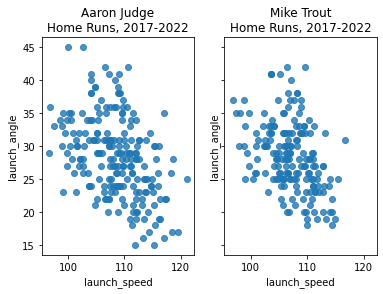

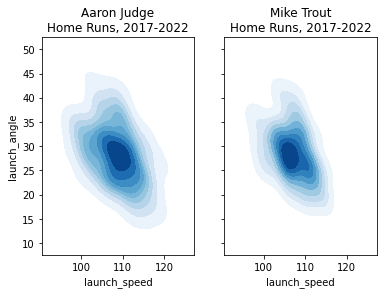

In [9]:
#Comparing Aaron Judge's home runs in different seasons
# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=judgeAaron, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017-2022')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=troutMike, ax=axs1[1]).set_title('Mike Trout\nHome Runs, 2017-2022')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judgeAaron['launch_speed'],judgeAaron['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017-2022')
sns.kdeplot(troutMike['launch_speed'], troutMike['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Mike Trout\nHome Runs, 2017-2022')

Text(0.5, 1.0, 'Home Runs, 2017-2022')

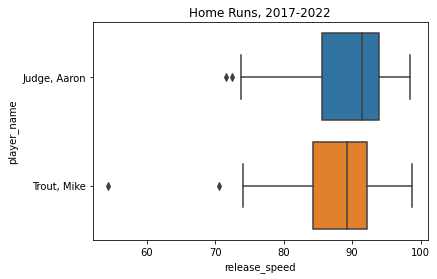

In [10]:
# Combine the Judge and Trout home run DataFrames for easy boxplot plotting
judgeTrout = pd.concat([judgeAaron,troutMike])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(data = judgeTrout, x = 'release_speed',y = 'player_name').set_title('Home Runs, 2017-2022')


Text(0.5, 1.0, 'Home Runs of Aaron Judge, 2017-2022')

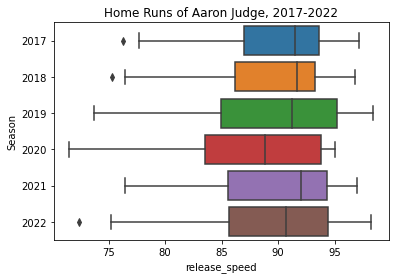

In [11]:

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(data = judgeAaron, x = 'release_speed',y = 'Season').set_title('Home Runs of Aaron Judge, 2017-2022')


In [12]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        # ... YOUR CODE FOR TASK 6 ...
        x = 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        # ... YOUR CODE FOR TASK 6 ...
        x = 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        # ... YOUR CODE FOR TASK 6 ..
        x = 3
    return x

In [13]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    # ... YOUR CODE FOR TASK 7 ...
    if row.zone in [1,2,3] :
        return 3
    # Middle third of strike zone
    # ... YOUR CODE FOR TASK 7 ...
    if row.zone in [4,5,6] : 
        return 2
    # Lower third of strike zone
    # ... YOUR CODE FOR TASK 7 ...
    if row.zone in [7,8,9] : 
        return 1

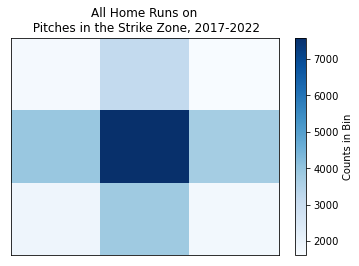

In [14]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
HR = HR.copy().loc[HR.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for all home runs
HR['zone_x'] = HR.apply(assign_x_coord,axis = 1)
HR['zone_y'] = HR.apply(assign_y_coord,axis = 1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(HR.zone_x,HR.zone_y,bins = 3, cmap='Blues')
plt.title('All Home Runs on\n Pitches in the Strike Zone, 2017-2022')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

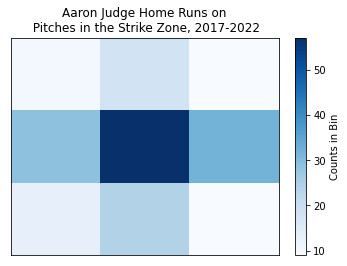

In [15]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judgeAaron = judgeAaron.copy().loc[judgeAaron.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judgeAaron['zone_x'] = judgeAaron.apply(assign_x_coord,axis = 1)
judgeAaron['zone_y'] = judgeAaron.apply(assign_y_coord,axis = 1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judgeAaron.zone_x,judgeAaron.zone_y,bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2017-2022')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

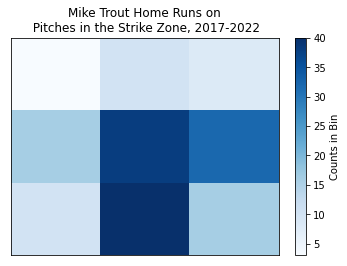

In [16]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
troutMike = troutMike.copy().loc[troutMike.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
troutMike['zone_x'] = troutMike.apply(assign_x_coord,axis = 1)
troutMike['zone_y'] = troutMike.apply(assign_y_coord,axis = 1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(troutMike.zone_x,troutMike.zone_y,bins = 3, cmap='Blues')
plt.title('Mike Trout Home Runs on\n Pitches in the Strike Zone, 2017-2022')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')